In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import scipy as sp 
import statsmodels.stats as stats
import statsmodels.api as sm 
import statsmodels.formula.api as smf
from patsy import dmatrix
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}
import pickle 
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100
np.set_printoptions(threshold=np.inf) # print numpy array fully 

train_16 = pd.read_csv("../Data/train_2016_for_model.csv")
test_16 = pd.read_csv("../Data/properties_2016_for_test.csv")

with open("../Data/data_dict.p", "rb") as f:
    data_dict = pickle.load(f) 

with open("../Data/catecols.p", "rb") as f:
    catecols = pickle.load(f) 
with open("../Data/numecols.p", "rb") as f:
    numecols = pickle.load(f) 
with open("../Data/bincols.p", "rb") as f:
    bincols = pickle.load(f)     

# # intergrating dataset : properties_16 : left, train_16 : right, left join 
# df_16 = pd.merge(properties_16, train_16, on="parcelid", how="intestner")

/Users/MAC/.pyenv/versions/anaconda3-5.0.1/envs/python_ana/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (22,30,32,47,52) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# categorical data processing 
def cate(col_list):
    return ["C({})".format(x) for x in col_list]
def nume(col_list):
    return ["scale({})".format(x) for x in col_list]

In [4]:
input_cols = cate(catecols) + nume(numecols) + bincols
formula = "logerror ~ " + (" + ").join(input_cols)
# formula = "logerror ~ " + (" + ").join(numecols)
formula += "-1"
formula

'logerror ~ C(airconditioningtypeid) + C(architecturalstyletypeid) + C(buildingqualitytypeid) + C(fips) + C(garagecarcnt) + C(heatingorsystemtypeid) + C(propertylandusetypeid) + C(regionidneighborhood) + C(regionidzip) + C(threequarterbathnbr) + C(typeconstructiontypeid) + C(unitcnt) + C(yearbuilt) + C(numberofstories) + scale(basementsqft) + scale(bathroomcnt) + scale(bedroomcnt) + scale(calculatedbathnbr) + scale(finishedfloor1squarefeet) + scale(calculatedfinishedsquarefeet) + scale(finishedsquarefeet12) + scale(finishedsquarefeet13) + scale(finishedsquarefeet15) + scale(finishedsquarefeet50) + scale(finishedsquarefeet6) + scale(fireplacecnt) + scale(fullbathcnt) + scale(garagetotalsqft) + scale(lotsizesquarefeet) + scale(poolcnt) + scale(poolsizesum) + scale(rawcensustractandblock) + scale(roomcnt) + scale(yardbuildingsqft17) + scale(yardbuildingsqft26) + scale(structuretaxvaluedollarcnt) + scale(taxvaluedollarcnt) + scale(landtaxvaluedollarcnt) + scale(taxamount) + scale(censustra

In [ ]:
# 기본 모델링 with OLS
model_init = smf.ols(formula, data=df_16).fit()
print(model_init.summary())

In [2]:
# categorical 로 처리 할 컬럼과 Numerical로 처리할 컬럼 구분 
catecols = []
numecols = []
obj_type = df_16.hashottuborspa.dtype

for col in df_16.columns:
    if df_16[col].dtype == obj_type:
        catecols.append(col)
    elif len(np.unique(df_16[col].fillna(0))) <= 30:
        catecols.append(col)
    else : 
        numecols.append(col)
len(catecols), len(numecols)

(34, 26)

In [3]:
print(len(catecols), len(numecols))
catecols.remove('transactiondate')
numecols.remove('parcelid')
numecols.remove('logerror')
print(len(catecols), len(numecols))

34 26
33 24


In [4]:
# data imputaion 
# cate -> 0 
# numerical -> np.mean ## 아주 간단한 버전 ! 
df_16[catecols] = df_16[catecols].fillna(0)
df_16[numecols] = df_16[numecols].fillna(df_16[numecols].mean())
df_16.to_csv("../Data/train_16_processed.csv")

In [5]:
df_16 = pd.read_csv("../Data/train_16_processed.csv")

In [6]:
# categorical data processing 
def cate(col_list):
    return ["C({})".format(x) for x in col_list]
def nume(col_list):
    return ["scale({})".format(x) for x in col_list]

In [9]:
input_cols = cate(catecols) + numecols
formula = "logerror ~ " + (" + ").join(input_cols)
# formula = "logerror ~ " + (" + ").join(numecols)
formula += "-1"

In [10]:
# 기본 모델링 with OLS
model_init = smf.ols(formula, data=df_16).fit()
print(model_init.summary())

                            OLS Regression Results                            
Dep. Variable:               logerror   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     40.69
Date:                Sat, 30 Jun 2018   Prob (F-statistic):          3.00e-143
Time:                        14:29:41   Log-Likelihood:                 37100.
No. Observations:               90275   AIC:                        -7.416e+04
Df Residuals:                   90256   BIC:                        -7.398e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [14]:
import numpy as np
from sklearn.manifold import TSNE
X = df_16[numecols].values
X_embedded = TSNE(n_components=2).fit_transform(X)
# plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=X_embedded[:, 2])

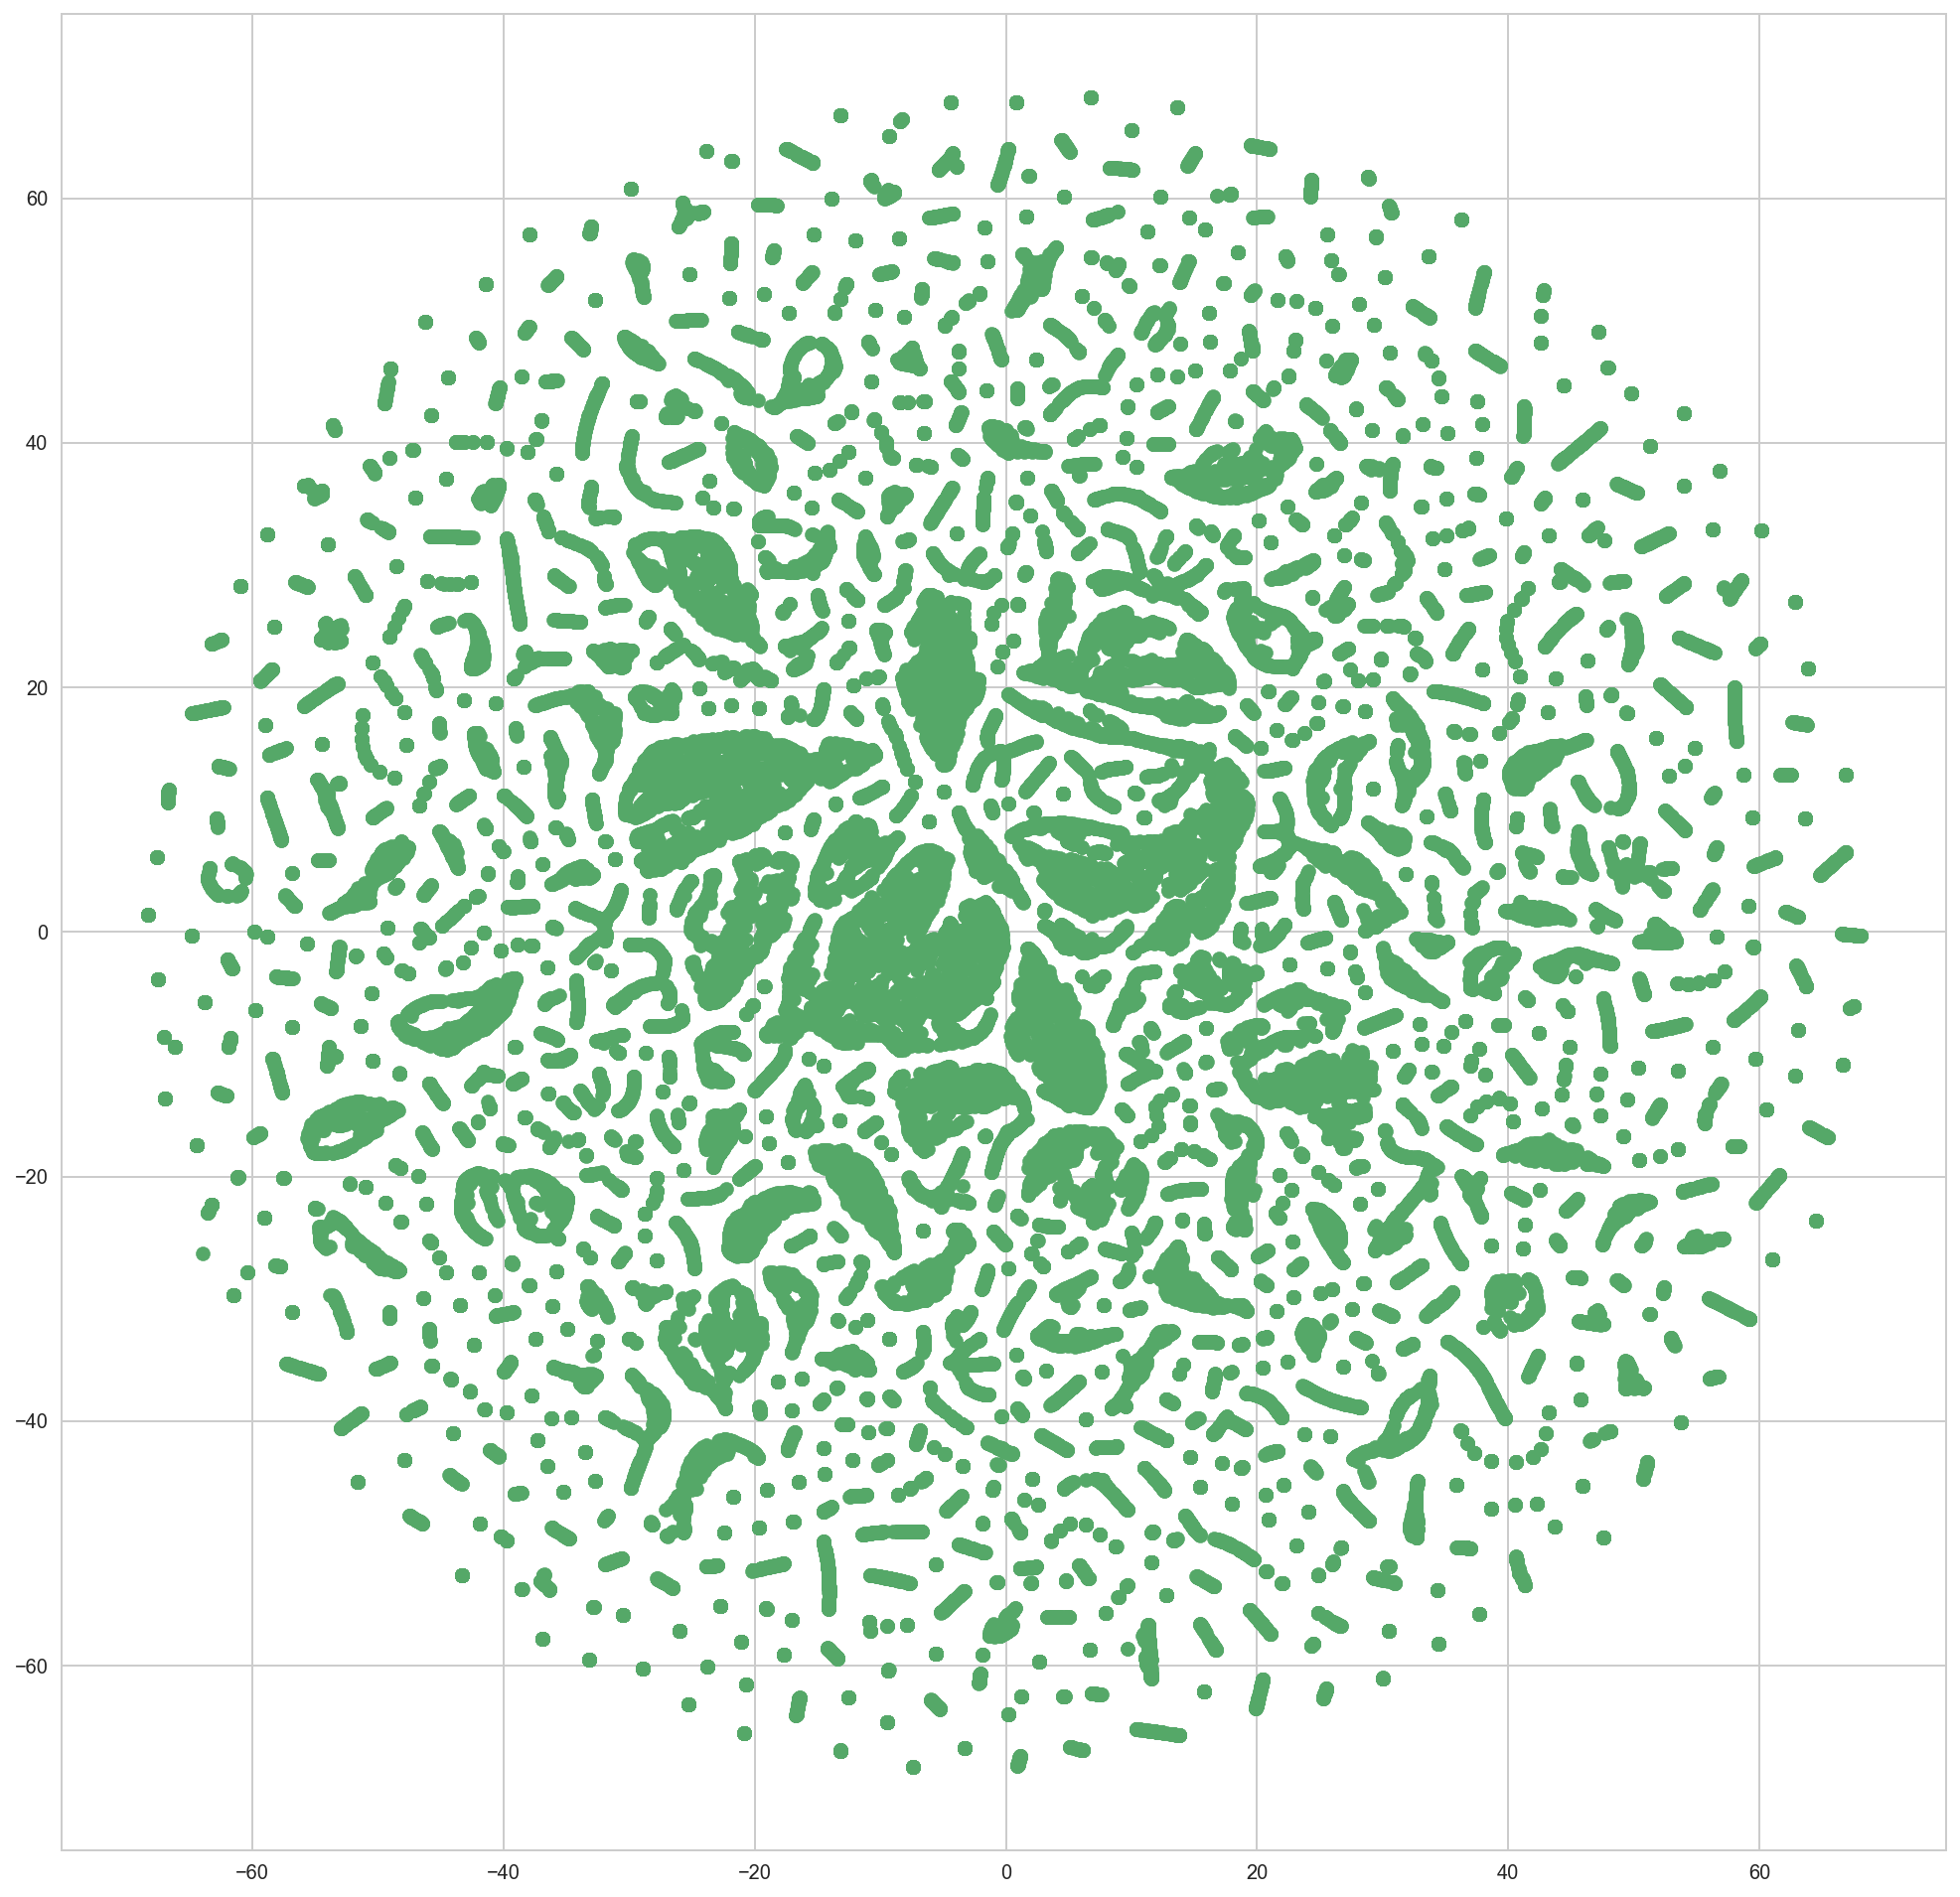

In [15]:
plt.figure(figsize=(17, 17))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c="g")